In [158]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [159]:
liver_data = pd.read_csv('indian_liver_patient.csv', sep=',')

In [160]:
liver_data.shape

(583, 11)

In [161]:
liver_data.Albumin_and_Globulin_Ratio.fillna(liver_data.Albumin_and_Globulin_Ratio.mean(), inplace=True)

In [162]:
liver_data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object

In [182]:
liver_data_rf= liver_data

In [183]:
le = LabelEncoder()

liver_data.Gender = le.fit_transform(liver_data.Gender)

In [184]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


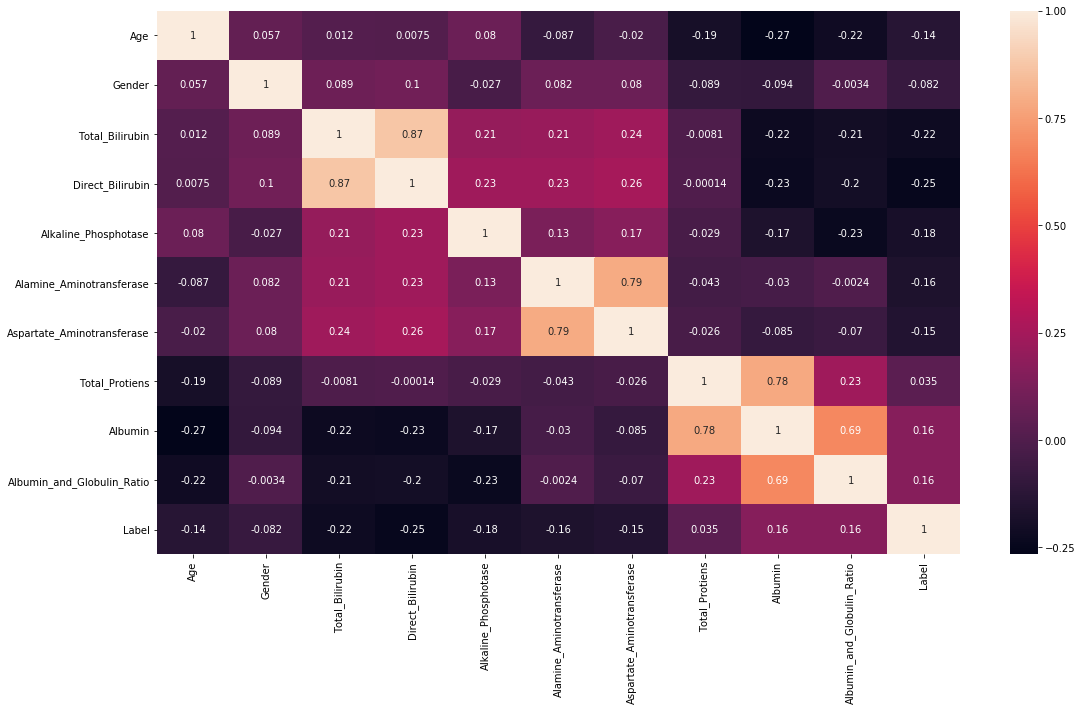

In [185]:
corr= liver_data.corr()

plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)

In [186]:
train_data = liver_data.sample(480, random_state=42)

In [187]:
test_data = liver_data.drop(train_data.index)

In [188]:
train_data.shape

(480, 11)

In [189]:
test_data.shape

(103, 11)

In [190]:
(liver_data.Label.value_counts())/(liver_data.Label.count())*100

1    71.35506
2    28.64494
Name: Label, dtype: float64

In [191]:
train_labels = train_data.Label

In [192]:
test_labels = test_data.Label

In [193]:
clf = DecisionTreeClassifier(criterion='gini')

In [194]:
clf.fit(train_data.iloc[:,:-1],train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [195]:
prediction = clf.predict(test_data.iloc[:,:-1])

In [196]:
confusion_matrix(test_labels,prediction)

array([[56, 18],
       [16, 13]])

In [197]:
accuracy_score(test_labels,prediction)*100

66.99029126213593

In [198]:
print(classification_report(test_labels,prediction))

             precision    recall  f1-score   support

          1       0.78      0.76      0.77        74
          2       0.42      0.45      0.43        29

avg / total       0.68      0.67      0.67       103



In [199]:
liver_data_rf= pd.get_dummies(liver_data_rf)

In [201]:
liver_data_rf.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
